In [2]:
import numpy as np
import pandas as pd

In [3]:
data = np.loadtxt('data.csv',delimiter=',')

In [4]:
data.shape

(100, 2)

In [5]:
data

array([[ 32.50234527,  31.70700585],
       [ 53.42680403,  68.77759598],
       [ 61.53035803,  62.5623823 ],
       [ 47.47563963,  71.54663223],
       [ 59.81320787,  87.23092513],
       [ 55.14218841,  78.21151827],
       [ 52.21179669,  79.64197305],
       [ 39.29956669,  59.17148932],
       [ 48.10504169,  75.3312423 ],
       [ 52.55001444,  71.30087989],
       [ 45.41973014,  55.16567715],
       [ 54.35163488,  82.47884676],
       [ 44.1640495 ,  62.00892325],
       [ 58.16847072,  75.39287043],
       [ 56.72720806,  81.43619216],
       [ 48.95588857,  60.72360244],
       [ 44.68719623,  82.89250373],
       [ 60.29732685,  97.37989686],
       [ 45.61864377,  48.84715332],
       [ 38.81681754,  56.87721319],
       [ 66.18981661,  83.87856466],
       [ 65.41605175, 118.5912173 ],
       [ 47.48120861,  57.25181946],
       [ 41.57564262,  51.39174408],
       [ 51.84518691,  75.38065167],
       [ 59.37082201,  74.76556403],
       [ 57.31000344,  95.45505292],
 

In [6]:
x = data[0:100,0].reshape(-1,1)   #all the rows and first column
y = data[0:100,1]   #all the rows and second column
#this will not work we have to convert this 1D array into 2D array

In [7]:
#now split it into training and testing
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y)

In [8]:
#now lets apply linear regression algorithm by importing it
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression()

In [9]:
alg1.fit(x_train,y_train)

LinearRegression()

In [10]:
alg1.coef_  #this is slope(m) in y = mx + c line

array([1.33859082])

In [11]:
alg1.intercept_  #this is c in y = mx + c

7.129976300434379

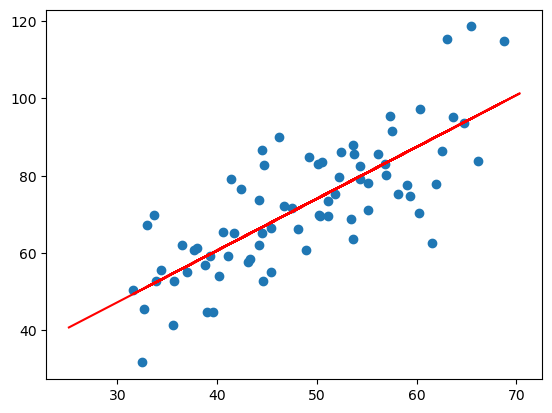

In [12]:
import matplotlib.pyplot as plt
m = alg1.coef_[0]
c = alg1.intercept_

# x_line = np.arange(20,70,0.1)
y = m * x + c
plt.plot(x,y,'r')  #this will create straight line

#train_1d = x_train.reshape(75)
plt.scatter(x_train,y_train)
plt.show()

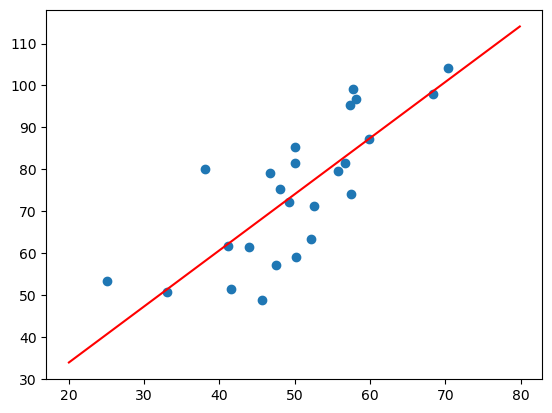

In [13]:
m = alg1.coef_[0]
c = alg1.intercept_

x_line = np.arange(20,80,0.1)
y_line = m * x_line + c
plt.plot(x_line,y_line,'r')  #this will create straight line

#train_1d = x_train.reshape(75)
plt.scatter(x_test,y_test)
plt.show()

In [14]:
score_test = alg1.score(x_test,y_test)
score_training = alg1.score(x_train,y_train)
score_test , score_training

(0.5945990887551529, 0.597295836512437)

In [15]:
x_test

array([[43.87061265],
       [38.11982403],
       [50.03017434],
       [49.23976534],
       [56.72720806],
       [57.50444762],
       [70.34607562],
       [59.81320787],
       [55.80573336],
       [33.09383174],
       [58.16454011],
       [50.13548549],
       [68.31936082],
       [45.61864377],
       [47.48120861],
       [52.22399609],
       [57.78822399],
       [25.12848465],
       [41.57564262],
       [41.18201611],
       [46.73761941],
       [57.31000344],
       [50.03957594],
       [48.10504169],
       [52.55001444]])

In [16]:
y_test

array([ 61.4247098 ,  80.16627545,  81.53699078,  72.11183247,
        81.43619216,  74.08413012, 104.25710159,  87.23092513,
        79.55043668,  50.71958891,  96.76956643,  59.10883927,
        97.91982104,  48.84715332,  57.25181946,  63.35879032,
        99.05141484,  53.45439421,  51.39174408,  61.68403752,
        79.05240617,  95.45505292,  85.23200734,  75.3312423 ,
        71.30087989])

In [17]:
alg1.predict(x_test[0].reshape(-1,1))

array([65.85477579])

## multiple linear regression

In [18]:
df = pd.read_csv('hiring.csv')

In [19]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [20]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(np.mean(df["test_score(out of 10)"]))

In [21]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.000000,9,50000
1,NaN,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [22]:
pip install word2number

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
from word2number import w2n
print(w2n.word_to_num('two point three'))

2.3


In [24]:
converted_experiences = []
# def wordtonum(str):
#     return w2n.word_to_num(str)
for str in df['experience'].iloc[2:]:
        converted_experiences.append(w2n.word_to_num(str))

In [25]:
df['experience'].iloc[2:] = converted_experiences

C:\Users\Riyank\AppData\Local\Temp\ipykernel_2668\2149503229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['experience'].iloc[2:] = converted_experiences


In [26]:
df['experience'] = df['experience'].fillna(np.floor(df['experience'].mean()))

In [27]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,6.0,8.000000,9,50000
1,6.0,8.000000,6,45000
2,5.0,6.000000,7,60000
3,2.0,10.000000,10,65000
4,7.0,9.000000,6,70000
5,3.0,7.000000,10,62000
6,10.0,7.857143,7,72000
7,11.0,7.000000,8,80000


__now its ready for training model__

In [28]:
alg2 = LinearRegression()

In [29]:
alg2.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [30]:
alg2.coef_

array([2823.76559304, 1329.00027432, 2929.14459978])

In [31]:
alg2.intercept_

11842.306307731225

In [32]:
alg2.predict([[2,9,6]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([47025.70756135])

In [33]:
alg2.predict([[12,10,10]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([88308.94216519])

In [34]:
12*2823.76559304 + 10*1329.00027432 + 10*2929.14459978 + 11842.306307731225

88308.94216521122